# Import packages

In [10]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings(('ignore'))


import pandas as pd
import numpy as np

from modules.Utils.utils import loadFromDB, computeFutureLinearRegression, strategyTester
from modules.Utils.indicators import computeRSI_VWAP

from ta.trend import macd_diff, ema_indicator, macd_signal

# Get Data

In [11]:
SYMBOL= 'ETH'
df =loadFromDB(SYMBOL,'1h')
df = computeRSI_VWAP(df,17,25,False)
df.dropna(inplace=True)
print(df.shape)
df.head()

(20810, 7)


,Open,High,Low,Close,Volume,Timestamp,RSI_VWAP
Date,,,,,,,
2020-06-01 16:00:00,238.22,240.15,237.83,239.74,24077.18384,1591027200,100.0
2020-06-01 17:00:00,239.74,239.78,238.10,238.75,10777.36675,1591030800,100.0
2020-06-01 18:00:00,238.71,239.12,237.66,239.03,10165.66036,1591034400,100.0
2020-06-01 19:00:00,239.03,239.90,237.64,237.83,12186.15560,1591038000,100.0
2020-06-01 20:00:00,237.83,242.47,237.24,241.62,39863.41890,1591041600,100.0


Period : [2020-06-01 16:00:00] -> [2022-10-16 17:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 3574.02 $
Performance vs US Dollar : 257.4 %
Buy and Hold Performence : 435.55 %
Performance vs Buy and Hold : -40.9 %
Best trade : +47.81 %, the 2021-05-05 12:00:00
Worst trade : -41.63 %, the 2022-06-22 06:00:00
Worst drawBack : -56.00000000000001 %
Total fees :  575.61 $

----- Trades Informations -----
Total trades on period : 108
Number of positive trades : 67
Number of negative trades :  41
Trades win rate ratio : 62.04 %
Average trades performance : 1.82 %
Average positive trades : 6.82 %
Median positive trades : 3.39 %
Average negative trades : -6.34 %
Median negative trades : -3.34 %

----- Plot -----


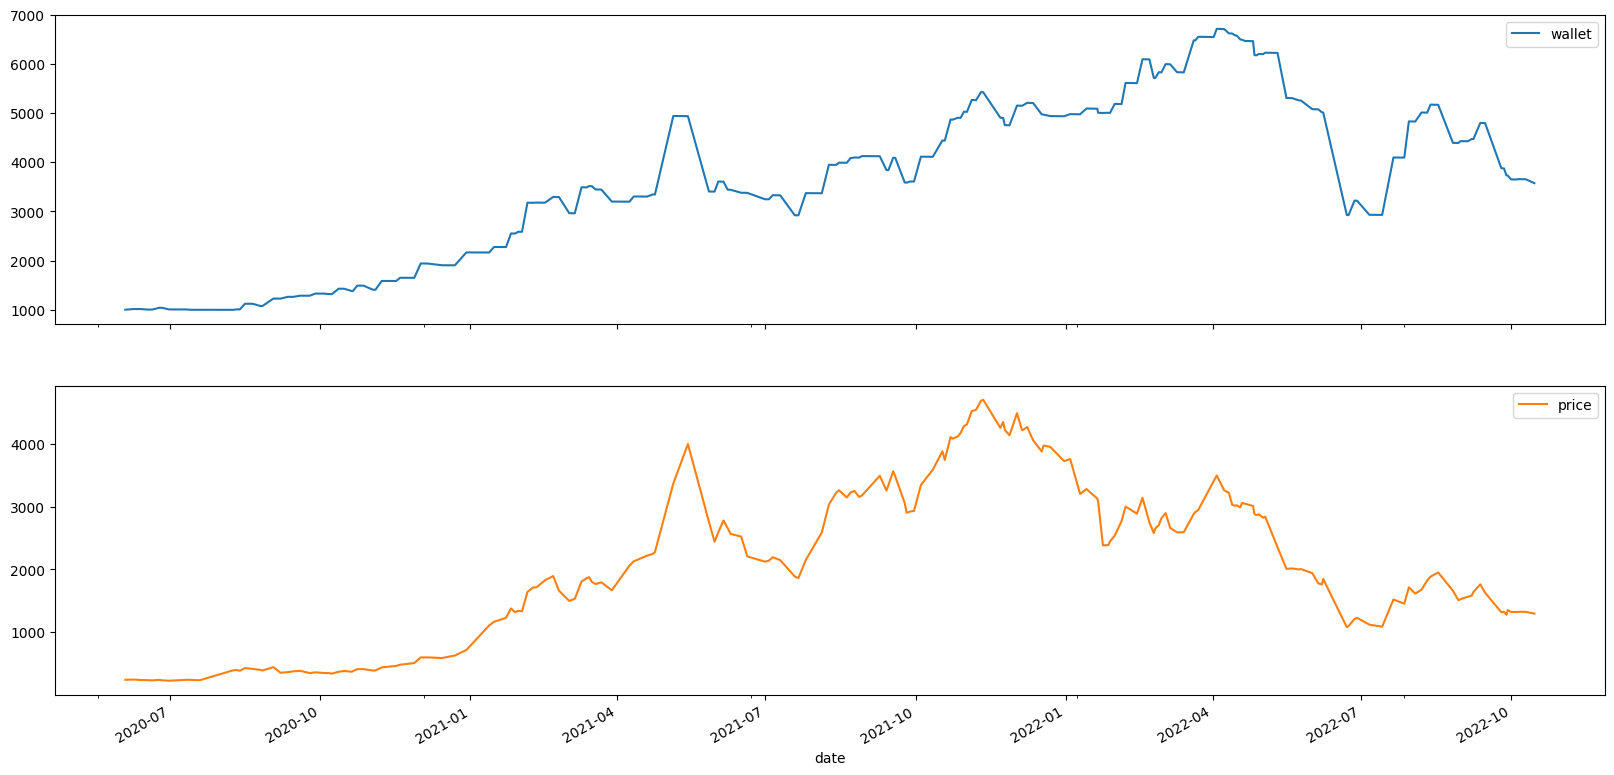

In [12]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.RSI_VWAP>19 and previous_row.RSI_VWAP<19 else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.RSI_VWAP<80 and previous_row.RSI_VWAP>80 else False

strategyTester(df,buyCondition,sellCondition,equity=1000)

In [20]:
SYMBOL= 'BTC'
df =loadFromDB(SYMBOL,'1h')
df['EMA200'] = ema_indicator(df.Close,70)
df['MACD'] = macd_diff(df.Close)
df['MACD_1'] = macd_signal(df.Close)
df.dropna(inplace=True)
print(df.shape)
df.head()

(20757, 9)


,Open,High,Low,Close,Volume,Timestamp,EMA200,MACD,MACD_1
Date,,,,,,,,,
2020-06-03 21:00:00,9581.36,9599.49,9567.43,9583.06,678.996436,1591218000,9622.570179,12.633563,-29.310764
2020-06-03 22:00:00,9583.07,9615.34,9559.05,9610.63,1550.169343,1591221600,9622.233836,13.468578,-25.943619
2020-06-03 23:00:00,9611.43,9690.00,9593.34,9666.24,2827.191468,1591225200,9623.473446,17.071327,-21.675788
2020-06-04 00:00:00,9666.32,9674.83,9600.01,9630.03,1527.959125,1591228800,9623.658138,16.321330,-17.595455
2020-06-04 01:00:00,9629.78,9669.00,9628.14,9641.94,1280.143913,1591232400,9624.173120,15.916138,-13.616421


Period : [2020-06-03 21:00:00] -> [2022-10-16 17:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 1.45 $
Performance vs US Dollar : -99.85 %
Buy and Hold Performence : 99.79 %
Performance vs Buy and Hold : -200.07 %
Best trade : +0.18 %, the 2020-06-19 10:00:00
Worst trade : -0.12 %, the 2020-08-23 11:00:00
Worst drawBack : -100.0 %
Total fees :  613.88 $

----- Trades Informations -----
Total trades on period : 4299
Number of positive trades : 546
Number of negative trades :  3753
Trades win rate ratio : 12.7 %
Average trades performance : -0.08 %
Average positive trades : 0.18 %
Median positive trades : 0.18 %
Average negative trades : -0.12 %
Median negative trades : -0.12 %

----- Plot -----


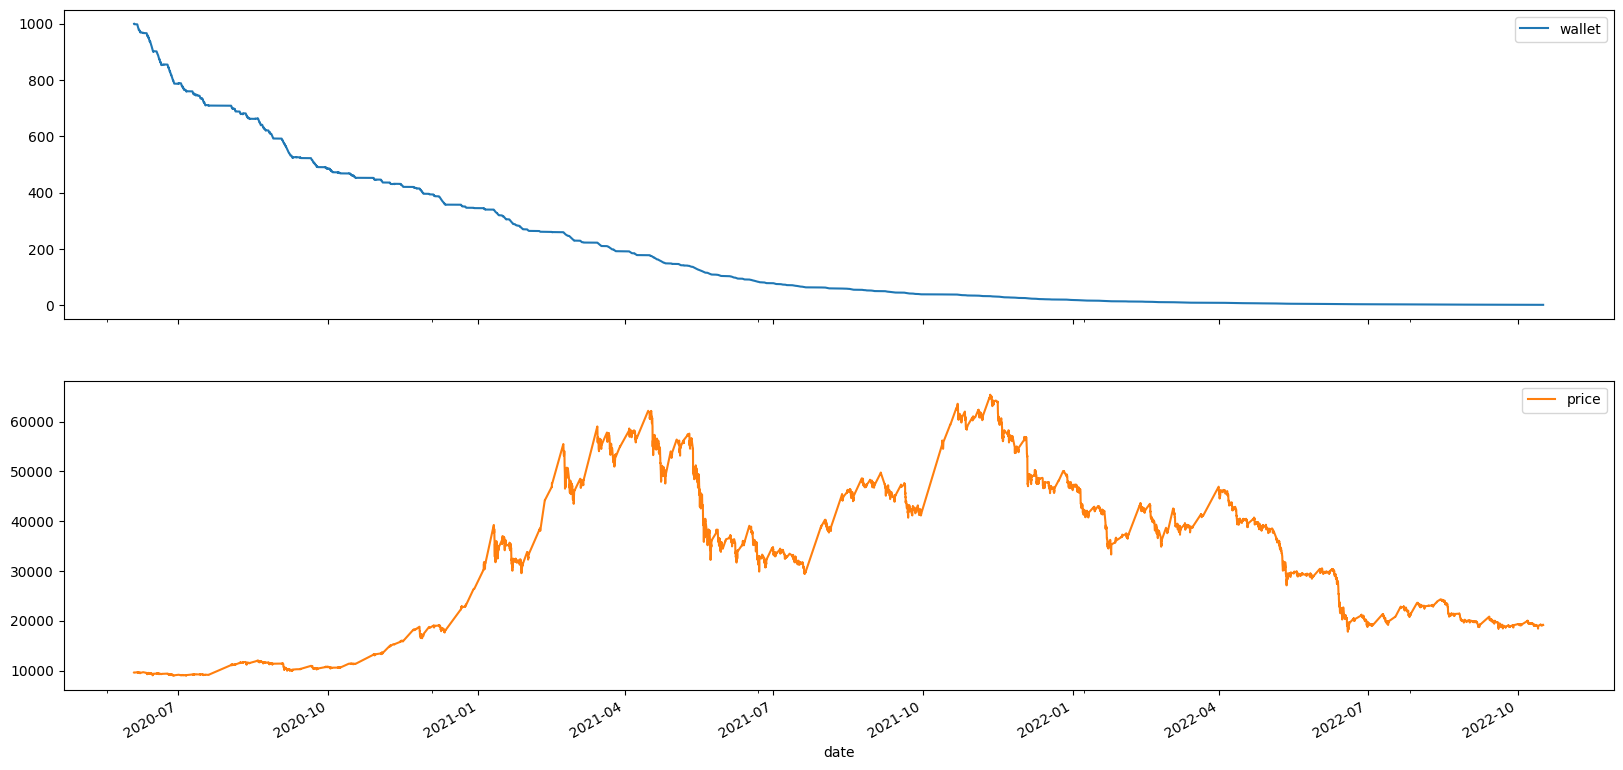

In [21]:
def buyCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.MACD_1<0 and row.EMA200>row.Close else False

def sellCondition(row:pd.Series, previous_row:pd.Series=None)->bool:
    return True if row.MACD_1>0 else False

TP = 0.002

strategyTester(df,buyCondition,sellCondition,equity=1000,stop_loss=True, take_profit=True, tp=TP,sl=TP/2)